# Couvertures d'un portefeuille obligataire

Voici le notebook du TP3 de finance et les liens correspondants aux questions:

1.<a href='#p1'>Partie 1</a>

- <a href='#p1e1'>Exercice 1</a>
- <a href='#p1e2'>Exercice 2</a>
- <a href='#p1e3'>Exercice 3</a>
- <a href='#p1e4'>Exercice 4</a>
- <a href='#p1e5'>Exercice 5</a>

2.<a href='#p2'>Partie 2</a>

- <a href='#p2e1'>Exercice 1</a>
- <a href='#p2e2'>Exercice 2</a>
- <a href='#p2e3'>Exercice 3</a>
- <a href='#p2e4'>Exercice 4</a>
- <a href='#p2e5'>Exercice 5</a>
- <a href='#p2e6'>Exercice 6</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
import time

from scipy.optimize import newton

import itertools #pour construire un iterator pour une def de matrice question 4 et 5

In [2]:
df= pd.read_csv("data_tp3.csv", sep= ';')
df.head()

,Maturity,rates,underlying,country,coupon
0,0.083333,-0.00597,AZ066741 Corp,Germany,0.0
1,0.250000,-0.00633,AZ923444 Corp,Germany,0.0
2,0.500000,-0.00617,ZR961307 Corp,Germany,0.0
3,1.000000,-0.00645,AU025425 Corp,Germany,0.0
4,2.000000,-0.00661,ZR204844 Corp,Germany,0.0


<a id='p1'></a>

# Partie 1

<a id='p1e1'></a>

## 1)

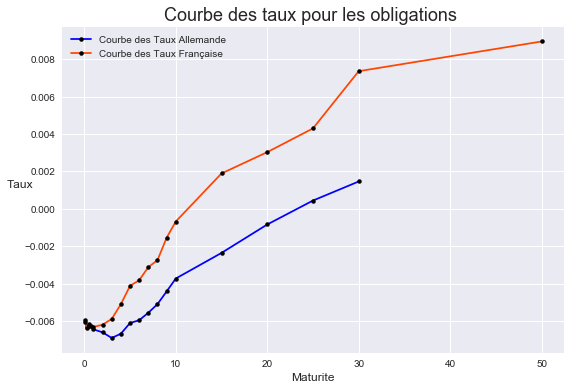

In [3]:
germany_data= df[df["country"] == "Germany"]
french_data= df[df["country"] != "Germany"]

mpl.style.use('seaborn')
fig, ax= plt.subplots(figsize= (9, 6))
plt.grid(b= True)

ax.plot(germany_data["Maturity"]
            ,germany_data["rates"]
            , marker= '.'
            , markerfacecolor= 'black'
            , markersize= 9
            , c= 'blue'
            , label= "Courbe des Taux Allemande")

ax.plot(french_data["Maturity"]
            ,french_data["rates"]
            , marker= '.'
            , markerfacecolor= 'black'
            , markersize= 9
            , c= 'orangered'
            , label= "Courbe des Taux Française")

ax.set_ylabel("Taux", rotation= 0, fontsize= 12)
ax.set_xlabel("Maturite", fontsize= 12)
ax.set_title("Courbe des taux pour les obligations ", fontsize= 18)
ax.legend()

plt.show()

#explication courbe des taux !!!!!!!!!

On constate que notre courbe zéro-coupons françaises est au dessus de notre courbe allemande (sauf au tout début).
On remarque alors que le coût du financement pour la France est supérieure à celui de l'Allemagne, pour chaque maturité.

Ainsi, pour chaque maturité, le taux français sera toujours au dessus du taux allemande. cela peut être lié à la confiance pour les titres souverains allemands par rapport aux titres français. En effet, l'obligation souveraine allemande est souvent utilisé en tant qu'actif sans risque sur le marché.

Néanmoins, on observe que la maturité max pour les titres français est plus élevé que pour l'Allemagne. Je pense qu'il y a rien à interpréter. Je pense que c'est dû à la selection des données.

Pour finir, les taux sont négatifs dans un premier temps. On constate une sorte de retournement de la courbe des taux de la maturite 0 à 5ans (plus la maturite augmente sur cette période, moins le taux est élevé). Ceci doit être dû au problème de conjoncture ==> Brexit, tension US-Chine, spectre de la déflation (fabile inflation), politiques monétaires "mondiales" expansionnistes.

<a id='p1e2'></a>

## 2)

In [17]:
securities= pd.DataFrame({
    "Titre": ["Compagnie des Alpes", "Korian", "Carrefour", "Total"],
    "Coupon": [0.03504, 0.037, 0.01, 0.01023],
    "Prix": [113, 110.23, 102.22, 106.57],
    "Maturite": pd.to_datetime(["24/10/2027", "07/10/2025", "27/10/2027", "27/10/2027"],
                              format= '%d/%m/%Y')
})

date_aujourdhui= dt.datetime.strptime("25/10/2019", '%d/%m/%Y')
securities["Maturite"]= securities["Maturite"].apply(lambda x: (x.year - date_aujourdhui.year))

securities

,Titre,Coupon,Prix,Maturite
0,Compagnie des Alpes,0.03504,113.00,8
1,Korian,0.03700,110.23,6
2,Carrefour,0.01000,102.22,8
3,Total,0.01023,106.57,8


In [21]:
#construction du portefeuille CASH FLOW
portefeuille_cashflow= pd.DataFrame({
    "Maturite": [i for i in range(1, np.max(securities["Maturite"].values) + 1)],
    "cash_flow": np.zeros(np.max(securities["Maturite"].values))
})
for i, val in securities.iterrows():
    for mat in range(val["Maturite"]):
        if mat != val["Maturite"] - 1:
            portefeuille_cashflow["cash_flow"][mat] += val["Coupon"]*100
        else:
            portefeuille_cashflow["cash_flow"][mat] += 100 + val["Coupon"]*100
portefeuille_cashflow

#ce que nous a couter la construction de ce portefeuille, c'est la somme des prix de nos actifs
prix_portefeuille= securities["Prix"].sum()
print(prix_portefeuille)
portefeuille_cashflow

432.02000000000004


C:\Users\Wenceslas\Anaconda3\envs\cours\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Wenceslas\Anaconda3\envs\cours\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Maturite,cash_flow
0,1,9.227
1,2,9.227
2,3,9.227
3,4,9.227
4,5,9.227
5,6,109.227
6,7,5.527
7,8,305.527


### Calcul du yield de mon portefeuille (1 valeur donc)

In [18]:
#Yield to mat fonction pour le portefeuille cash flow
def f_cashflow(x, df, p, n=100):
    somme= 0
    
    for i in portefeuille_cashflow.index:
        C= portefeuille_cashflow.loc[i, "cash_flow"]
        somme += C*pow(x, i)
    return p - somme 


def fprime_cashflow(x, df, p, n=100):
    somme= 0
    
    for i in portefeuille_cashflow.index:
        C= portefeuille_cashflow.loc[i, "cash_flow"]
        somme += i*C*pow(x, i-1)
    return - somme

def yield_to_mat_cash_flow(f, x0, fprime, args):
    new= newton(func= f,x0=x0, fprime=fprime, args= args)
    return (1/new) - 1

In [19]:
portefeuille_y= yield_to_mat_cash_flow(f_cashflow, 1, fprime_cashflow, \
                                       (portefeuille_cashflow, prix_portefeuille))

portefeuille_y

0.012832386354566516

### Calcul du yield pour les positions de mon portefeuille

In [22]:
from scipy.optimize import newton
def yield_to_maturity(P,c,T,N):
    """
    Renvoie le yield to maturity d'une obligation. Paramètres :
        - P : le prix de l'obligation
        - c : le taux de coupon de l'obligation
        - T : la maturité de l'obligation
        - N : le nominal de l'obligation
    """
    def f(x,P,c,T,N):
        """
        Approxime la fonction de cash flows. Paramètres :
            - x : la variable permettant l'optimisation par Newton
            - P : le prix de l'obligation
            - c : le taux de coupon de l'obligation
            - T : la maturité de l'obligation
            - N : le nominal de l'obligation
        """
        result = P
        for i in range(1,int(T)):
            result -= c*N*(x**i)
        result -= N*(1+c)*(x**T)
        return result
    
    def fprime(x,P,c,T,N):
        """
        Dérivée de l'approximation de la fonction de cash flows. Paramètres :
            - x : la variable permettant l'optimisation par Newton
            - P : le prix de l'obligation
            - c : le taux de coupon de l'obligation
            - T : la maturité de l'obligation
            - N : le nominal de l'obligation
        """
        result = 0
        for i in range(1,int(T)):
            result -= i*c*N*(x**(i-1))
        result -= T*N*(1+c)*(x**(T-1))
        return result
    
    x = newton(func=f,
           x0=1.1, # puisque y est de l'ordre 0.01 et que x = 1/(1+y) 1.1 semble etre un ordre de grandeur raisonable
           fprime=fprime,
           args=(P,c,T,N)
        )
    y = 1/x - 1
    return y

In [23]:
securities["Yield"]= securities.apply(lambda row: yield_to_maturity(row[2], row[1], row[3], 100), axis=1)

In [24]:
#yield to mat de toutes nos positions
securities

,Titre,Coupon,Prix,Maturite,Yield
0,Compagnie des Alpes,0.03504,113.00,8,0.017486
1,Korian,0.03700,110.23,6,0.018810
2,Carrefour,0.01000,102.22,8,0.007135
3,Total,0.01023,106.57,8,0.001945


In [25]:
portefeuille_cashflow

,Maturite,cash_flow
0,1,9.227
1,2,9.227
2,3,9.227
3,4,9.227
4,5,9.227
5,6,109.227
6,7,5.527
7,8,305.527


### Calcul duration du portefeuille

In [27]:
def duration(df, y, n=100):
    somme= 0
    for i in portefeuille_cashflow.index:
        C= portefeuille_cashflow.loc[i, "cash_flow"]
        m= portefeuille_cashflow.loc[i, "Maturite"]
        somme -= m*C/pow(1+y, m+1)
    return somme#somme -(m*(n+C))/pow(1+y, (m+1))

print(duration(portefeuille_cashflow, portefeuille_y))
print("\nMC:")
print(duration(portefeuille_cashflow, portefeuille_y)/prix_portefeuille)

-2943.986751988242

MC:
-6.814468663460584


<a id='p1e3'></a>

## 3)

In [28]:
germany_data

,Maturity,rates,underlying,country,coupon
0,0.083333,-0.00597,AZ066741 Corp,Germany,0.00
1,0.250000,-0.00633,AZ923444 Corp,Germany,0.00
2,0.500000,-0.00617,ZR961307 Corp,Germany,0.00
3,1.000000,-0.00645,AU025425 Corp,Germany,0.00
4,2.000000,-0.00661,ZR204844 Corp,Germany,0.00
5,3.000000,-0.00691,AO131132 Corp,Germany,0.00
6,4.000000,-0.00668,AT634023 Corp,Germany,0.00
7,5.000000,-0.00611,AZ321298 Corp,Germany,0.00
8,6.000000,-0.00596,AF205634 Corp,Germany,1.00
9,7.000000,-0.00556,LW743065 Corp,Germany,0.00


In [29]:
def duration_i(y, C, m, n=100):
    return -(m*(1))/pow(1+y, (m+1))


In [36]:
#ici faut répondre à une question, la 3ème
french_data["Duration_i"]= french_data.apply(lambda row: duration_i(y=row[1], C=1, m=row[0], n=1)
                            , axis= 1)
germany_data["Duration_i"]= germany_data.apply(lambda row: duration_i(y=row[1], C=1, m=row[0], n=1)
                            , axis= 1)

# french_data["Duration"]= french_data.apply(lambda row: duration(y=row[1], C=row[4], m=row[0], n=100)
#                             , axis= 1)
# germany_data["Duration"]= germany_data.apply(lambda row: duration(y=row[1], C=row[4], m=row[0], n=100)
#                             , axis= 1)
french_data2= french_data[np.logical_and(french_data["Maturity"] <= 8, \
                                        french_data["Maturity"] >= 1)].reset_index(drop= True, inplace= False)
germany_data2= germany_data[np.logical_and(germany_data["Maturity"] <= 8, \
                                        germany_data["Maturity"] >= 1)].reset_index(drop= True, inplace= False)

french_data2["Duration_i"]= french_data2["Duration_i"]*portefeuille_cashflow["cash_flow"]
germany_data2["Duration_i"]= germany_data2["Duration_i"]*portefeuille_cashflow["cash_flow"]

french_data2

C:\Users\Wenceslas\Anaconda3\envs\cours\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Wenceslas\Anaconda3\envs\cours\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Maturity,rates,underlying,country,coupon,Duration_i
0,1.0,-0.00632,ZQ078370 Corp,France,0.00,-9.344744
1,2.0,-0.00620,AW799417 Corp,France,0.00,-18.801545
2,3.0,-0.00589,AP173983 Corp,France,0.00,-28.342882
3,4.0,-0.00510,AT122915 Corp,France,0.00,-37.863727
4,5.0,-0.00412,ZS171522 Corp,France,0.00,-47.292085
5,6.0,-0.00382,UV715505 Corp,France,1.00,-673.157251
6,7.0,-0.00312,QZ358353 Corp,France,0.25,-39.668378
7,8.0,-0.00275,EJ346891 Corp,France,2.75,-2505.550600


In [37]:
# on print la somme des durations
print(germany_data2["Duration_i"].sum())
print(french_data2["Duration_i"].sum())
germany_data2

-3425.8022129274736
-3360.02121150659


,Maturity,rates,underlying,country,coupon,Duration_i
0,1.0,-0.00645,AU025425 Corp,Germany,0.0,-9.347190
1,2.0,-0.00661,ZR204844 Corp,Germany,0.0,-18.824834
2,3.0,-0.00691,AO131132 Corp,Germany,0.0,-28.459505
3,4.0,-0.00668,AT634023 Corp,Germany,0.0,-38.165821
4,5.0,-0.00611,AZ321298 Corp,Germany,0.0,-47.863075
5,6.0,-0.00596,AF205634 Corp,Germany,1.0,-683.367359
6,7.0,-0.00556,LW743065 Corp,Germany,0.0,-40.453754
7,8.0,-0.00510,AO223542 Corp,Germany,0.5,-2559.320674


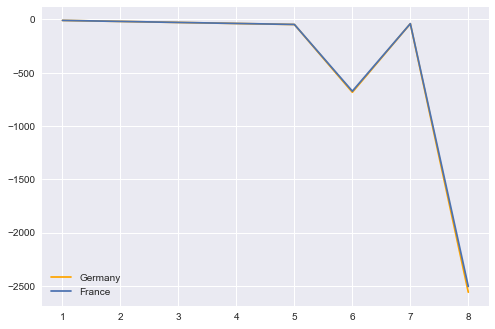

In [38]:
plt.plot(germany_data2["Maturity"], germany_data2["Duration_i"], label= "Germany", c="orange")
plt.plot(french_data2["Maturity"], french_data2["Duration_i"], label= "France")
plt.legend()

### Remarque:

Les durations sont peu différentes ==> la seule différence est le taux de nos obligations. Néanmoins, l'écart des taux est faible pour les maturités inférieures à 10. C'est pour ça que l'on constate ces courbes, qui pour notre échelle de maturité, semblent superposées.

Par conséquent, la duration sera la plus forte pour la maturité la plus forte car c'est à ce point que l'on va percevoir un gros cash flow, lié à 3 nominaux et des coupons. 

Mais on observe une picà la maturité 6, qui est lié au nominal percu à cette date par une des obligations de notre portefeuille.

<a id='p1e4'></a>

## 4)

In [39]:
#On va récupéré les données pour les 8 premières années
french_data2
french_data2= french_data2.assign(mat= portefeuille_cashflow["cash_flow"])
french_data2

,Maturity,rates,underlying,country,coupon,Duration_i,mat
0,1.0,-0.00632,ZQ078370 Corp,France,0.00,-9.344744,9.227
1,2.0,-0.00620,AW799417 Corp,France,0.00,-18.801545,9.227
2,3.0,-0.00589,AP173983 Corp,France,0.00,-28.342882,9.227
3,4.0,-0.00510,AT122915 Corp,France,0.00,-37.863727,9.227
4,5.0,-0.00412,ZS171522 Corp,France,0.00,-47.292085,9.227
5,6.0,-0.00382,UV715505 Corp,France,1.00,-673.157251,109.227
6,7.0,-0.00312,QZ358353 Corp,France,0.25,-39.668378,5.527
7,8.0,-0.00275,EJ346891 Corp,France,2.75,-2505.550600,305.527


In [134]:
def matrice_d_construction2(df):
    """
    Retourne une DF matrice composé par ligne du cash flow associé à une maturité
    """
    dicto= {i:np.array(np.repeat(df[df["Maturity"] == i]["coupon"], df.shape[0]))\
                    for i in df["Maturity"].values}
    
    test_df= pd.DataFrame.from_dict(dicto)
    test_matrix= pd.DataFrame.from_dict(dicto).to_numpy()
    np.fill_diagonal(test_matrix, test_matrix.diagonal() + 100)
    
    return pd.DataFrame(test_matrix, columns= [i for i in df["Maturity"].values])

def matrice_d_construction3(df):
    """
    Me permet d'afficher une matrice triangulaire sup avec les cash_flow dans l'ordres de maturité
    Pour la 2 ème colonne, le cash flow s'arrète à partir de la 
    troisième ligne, avec une suite de 0.
    
    C'est un traitement nécessaire pour construire la matrice de dérivé par rapport à tous les taux
    obligataires
    
    Voici un exemple d'ouput:
        1.0	2.0	3.0	4.0	5.0	6.0	7.0	8.0
    0	9.227	9.227	9.227	9.227	9.227	9.227	9.227	9.227
    1	0.000	9.227	9.227	9.227	9.227	9.227	9.227	9.227
    2	0.000	0.000	9.227	9.227	9.227	9.227	9.227	9.227
    3	0.000	0.000	0.000	9.227	9.227	9.227	9.227	9.227
    4	0.000	0.000	0.000	0.000	9.227	9.227	9.227	9.227
    5	0.000	0.000	0.000	0.000	0.000	109.227	109.227	109.227
    6	0.000	0.000	0.000	0.000	0.000	0.000	5.527	5.527
    7	0.000	0.000	0.000	0.000	0.000	0.000	0.000	305.527
    
    """
    df_out= pd.DataFrame({
        i:df["mat"].values for i in df["Maturity"].values
    })
    colname= [i for i in df["Maturity"].values]
    return pd.DataFrame(np.triu(df_out, 0), columns= colname)
    
matrice_d_construction3(french_data2)

# french_data_18= french_data_2[np.logical_or(french_data_2["Maturity"] == 1, french_data_2["Maturity"] == 8)]
# french_data_18= french_data_18.reset_index(drop= True)
# matrice_d_construction2(french_data_18)

# matrice_d(french_data_18)

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
0,9.227,9.227,9.227,9.227,9.227,9.227,9.227,9.227
1,0.000,9.227,9.227,9.227,9.227,9.227,9.227,9.227
2,0.000,0.000,9.227,9.227,9.227,9.227,9.227,9.227
3,0.000,0.000,0.000,9.227,9.227,9.227,9.227,9.227
4,0.000,0.000,0.000,0.000,9.227,9.227,9.227,9.227
5,0.000,0.000,0.000,0.000,0.000,109.227,109.227,109.227
6,0.000,0.000,0.000,0.000,0.000,0.000,5.527,5.527
7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,305.527


In [102]:
#rappel de la fonction
#pour ne pas oublier la façon dont je dois l'appeller
def duration_i(y, C, m):
    return -(m*(C))/pow(1+y, (m+1))

# def matrice_d_construction(df):
#     """
#     Retourne une matrice sur laquelle je peux taffer pour la fonction matrice_d.
#     C'est une matrice (dans un DF) qui affiche en diagonale la valeur du nominal (ici n=100)
#         et sur le reste des lignes la valeur du coupon qui est associé à une maturité (en ligne)
#     """
#     test_df= pd.DataFrame()
#     for i in df["Maturity"].values:
#         test_df[i]= df.apply(lambda row: row.coupon, axis= 1)
        
#     test_matrix= test_df.to_numpy().reshape(df.shape[0], df.shape[0])
#     np.fill_diagonal(test_matrix, test_matrix.diagonal() + 100)
#     test_df_out= pd.DataFrame(test_matrix, columns= [i for i in df["Maturity"].values])
    
#     return test_df_out

def matrice_d_construction2(df):
    """
    Retourne une DF matrice composé par ligne du cash flow associé à une maturité
    """
    dicto= {i:np.array(np.repeat(df[df["Maturity"] == i]["coupon"], df.shape[0]))\
                    for i in df["Maturity"].values}
    
    test_df= pd.DataFrame.from_dict(dicto)
    test_matrix= pd.DataFrame.from_dict(dicto).to_numpy()
    np.fill_diagonal(test_matrix, test_matrix.diagonal() + 100)
    
    return pd.DataFrame(test_matrix, columns= [i for i in df["Maturity"].values])


def matrice_d(df):
    """
    Sortie est la matrice n*n contenant la dérivé des n titres par rapports à leurs
    n taux
    -df : DataFrame qui doit contenir les colonnes suivantes: Maturity et coupon 
    (attention aux majuscules)
    """
    try_df= matrice_d_construction3(df)

    iterator= itertools.product(df["Maturity"].index,
                               df["Maturity"].values)

    df_copy= df.copy()
    df_copy= df_copy.reset_index(drop= True, inplace= False)

    listed_stock= []
    for ite in iterator:
        m= ite[1]
        idx= ite[0]
        r= df_copy["rates"][idx]
        listed_stock.append(duration_i(r, try_df[m][idx], m))

    matrice_d_out= np.array(listed_stock).reshape(df.shape[0], df.shape[0])
    
    return matrice_d_out


def poids_couverture(matrice_d, vector_d):
    """
    Ressort le poids pour nous protéger contre les variations de la courbe des taux
    """
    return -np.dot(vector_d, np.linalg.inv(matrice_d))

#pour voir ce que print ma fameuse fonction de matrice_d_construction
# matrice_d_construction3(french_data_2)

In [94]:
#construison un df contenant que 2 titres = celui a la maturité 1an, et l'autre à la maturité 8ans
french_data_18= french_data2[np.logical_or(french_data2["Maturity"] == 1, french_data2["Maturity"] == 8)]
french_data_18= french_data_18.reset_index(drop= True)

#try
matrice_d_fr_18= matrice_d(french_data_18)
vecteur_d_fr_18= np.array(french_data_18["Duration_i"].values)
poids_couverture_18ans= poids_couverture(matrice_d_fr_18, vecteur_d_fr_18)
np.round(poids_couverture_18ans, 2)

array([-1.  , -0.97])

### Remarque

On a donc chercher les poids des obligations souverains (français dans notre cas) pour protéger notre protefeuille contre une variation de la courbe des taux pour la maturité 1an et 8ans. Les valeurs obtenues ne semblent pas aberrantes, même si je ne suis pas sur de leur pertinence. En effet, peu importe le titre sélectionné en première place, il aura toujours le poids -1; ce qui est bizarre. De plus, si on change les valeurs, parfois, la valeur devient positives ==> nous sommes dans un contexte de converture de notre portefeuille en cherchant les quantités d'actifs à vendre pour se protéger ==> les valeurs devraient donc toutes être négatives ?!

J'espère que la cause de tous ces problèmes est liées aux taux négatifs.

<a id='p1e5'></a>

## 5)

In [96]:
matrice_d_fr= matrice_d(french_data2)
matrice_d_fr
vecteur_d_fr= np.array(french_data2["Duration_i"].values)
poids= np.round(poids_couverture(matrice_d_fr, vecteur_d_fr), 2)
print(poids)
for i in poids:
    print(i)

[-1.000e+00  0.000e+00  0.000e+00  0.000e+00  1.000e-02 -9.200e-01
  1.888e+01 -9.800e-01]
-1.0
0.0
0.0
0.0
0.01
-0.92
18.88
-0.98


### Remarque

Voici les poids necessaire pour se convrir pour la période de détention de notre portefeuille. 

On observe 2 types de valeurs aberrantes:
- un poids très fortement positif (presque 19 titres de maturité 7 sont nécessaire)
- un poids positif

Aussi, notre premier poids est encore -1

<a id='p2'></a>

# Partie 2

<a id='p2e1'></a>

## 1)

In [103]:
def taux_vasicek_disc(r0, a, b, sig, h, k):
    r= [r0]
    i= 0
    for i in range(0, k):
        alea= sig*np.sqrt(h)*np.random.normal(0, 1, 1)
        retour= a*(b-r[i])*h
        r.append(r[i] + retour + alea)
    return r

In [104]:
np.random.seed(55)
data1= taux_vasicek_disc(0.01, 0.02, 0.005, 0.02, 1/12, 36)
data1

[0.01,
 array([0.00061705]),
 array([3.67058139e-05]),
 array([-0.01040386]),
 array([-0.00886175]),
 array([-0.00733781]),
 array([-0.00951745]),
 array([-0.00950647]),
 array([-0.00750998]),
 array([-0.002307]),
 array([-0.00437963]),
 array([0.0051995]),
 array([-0.00166559]),
 array([0.00796665]),
 array([-0.00360515]),
 array([-0.00634981]),
 array([0.00157187]),
 array([0.00306812]),
 array([0.00712637]),
 array([0.0122519]),
 array([0.01640955]),
 array([0.00841096]),
 array([0.00266956]),
 array([0.00169504]),
 array([0.0033632]),
 array([0.00508099]),
 array([0.00399788]),
 array([0.00187436]),
 array([0.01025564]),
 array([0.01151237]),
 array([0.01407143]),
 array([0.01284038]),
 array([0.00990071]),
 array([0.0122023]),
 array([0.01806491]),
 array([0.02503459]),
 array([0.0276177])]

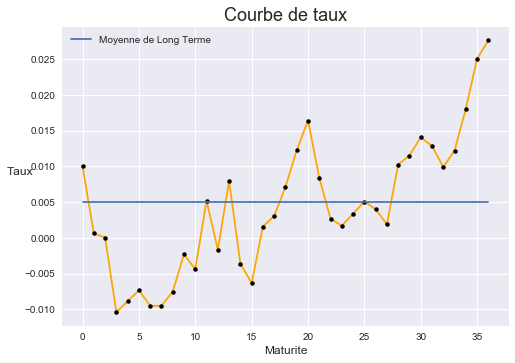

In [86]:
mpl.style.use('seaborn')
fig, ax= plt.subplots()

ax.plot([i for i in range(len(data1))]
            , np.ravel(data1)
            , marker= '.'
            , markerfacecolor= 'black'
            , markersize= 9
            , c= 'orange'
            )
b= 0.005
ax.plot([i for i in range(len(data1))]
        , [b for i in range(len(data1))]
        , label= "Moyenne de Long Terme"
       )

ax.set_ylabel("Taux", rotation= 0, fontsize= 12)
ax.set_xlabel("Maturite", fontsize= 12)
ax.set_title("Courbe de taux", fontsize= 18)
ax.legend()

plt.show()

### Remarque

C'est un modèle de modélisation des taux en continues. On considère que a long terme, notre taux = b et que les taux court fluctuent autour de cette moyenne de long terme. On considère aussi une vitesse de retour vers cette moyenne de long terme, a.

Dans notre plot, on remarque alors les taux semblent en effet fluctuer autours du seuil b=0.005.

In [105]:
np.random.seed(5)
data2= taux_vasicek_disc(0.01, 0.1, 0.005, 0.02, 1/12, 36)
data2

[0.01,
 array([0.01250576]),
 array([0.01053293]),
 array([0.02452089]),
 array([0.02290276]),
 array([0.0233864]),
 array([0.03236964]),
 array([0.02689211]),
 array([0.02329386]),
 array([0.02422454]),
 array([0.02215983]),
 array([0.0151304]),
 array([0.01386312]),
 array([0.01171756]),
 array([0.01514573]),
 array([0.00544952]),
 array([0.00140329]),
 array([0.00808082]),
 array([0.01877845]),
 array([0.00993883]),
 array([0.0136207]),
 array([0.00788732]),
 array([0.00291622]),
 array([-0.00210021]),
 array([-0.0044804]),
 array([0.00135156]),
 array([0.00549513]),
 array([0.00583247]),
 array([0.00372795]),
 array([0.00375754]),
 array([0.00315631]),
 array([0.00775037]),
 array([0.00408107]),
 array([0.00405296]),
 array([0.00347734]),
 array([0.00318802]),
 array([0.00464198])]

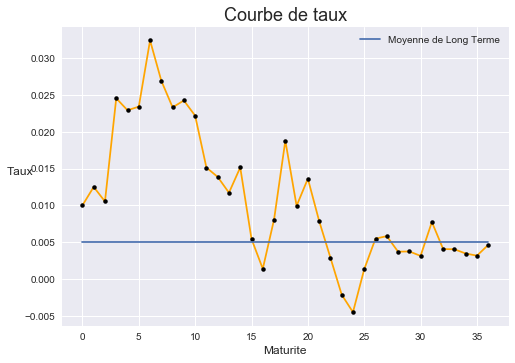

In [106]:
mpl.style.use('seaborn')
fig, ax= plt.subplots()

ax.plot([i for i in range(len(data2))]
            , np.ravel(data2)
            , marker= '.'
            , markerfacecolor= 'black'
            , markersize= 9
            , c= 'orange'
            )
b= 0.005
ax.plot([i for i in range(len(data2))]
        , [b for i in range(len(data2))]
        , label= "Moyenne de Long Terme"
       )

ax.set_ylabel("Taux", rotation= 0, fontsize= 12)
ax.set_xlabel("Maturite", fontsize= 12)
ax.set_title("Courbe de taux", fontsize= 18)
ax.legend()

plt.show()

### Remarque

On a donc augmenter notre vitesse de retour vers la moyenne de long terme. Toutes choses étant égales par ailleurs, on constate alors que les taux flanchent beaucoup plus rapidement vers notre b=0.005

<a id='p2e2'></a>
<a id='p2e3'></a>

## 2) / 3)

In [108]:
def taux_zero_continue(r0, a, b, sig, i):
#     r= [r0]
#     for i in range(i):
    zoo= b - pow(sig, 2)/(2*pow(a, 2))
    if i == 0:
        return zoo
    else:
        s= r0 - zoo
        phi= (1 - np.exp(-a*i))/a
        r= zoo + s*phi/i \
                + (pow(sig, 2)/(4*pow(a, 3)))*(pow(phi,2)/i)
        return r
        

In [109]:
#génération valeur pour la courbe
r0= 0.005
a= 0.01
b= 0
sig= 0.001
dico_courbe_taux ={
    i:taux_zero_continue(r0, a, b, sig, i) for i in range(0, 11)
}
dico_courbe_taux

{0: -0.004999999999999999,
 1: 0.2524646872988169,
 2: 0.49501633686238095,
 3: 0.7327402281774613,
 4: 0.9657201914552731,
 5: 1.194038632365634,
 6: 1.4177765563443314,
 7: 1.6370135924810627,
 8: 1.85182801699535,
 9: 2.0622967763075426,
 10: 2.268495509712084}

No handles with labels found to put in legend.


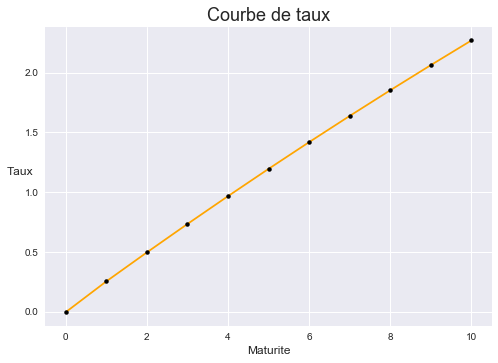

In [110]:
data= list(dico_courbe_taux.items())

mpl.style.use('seaborn')
fig, ax= plt.subplots()

ax.plot([i[0] for i in data]
            ,[i[1] for i in data]
            , marker= '.'
            , markerfacecolor= 'black'
            , markersize= 9
            , c= 'orange'
            )

ax.set_ylabel("Taux", rotation= 0, fontsize= 12)
ax.set_xlabel("Maturite", fontsize= 12)
ax.set_title("Courbe de taux", fontsize= 18)
ax.legend()

plt.show()

### Remarque

On pourrait penser que notre fonction n'est pas bonne mais ... si la courbe des taux ressemble à une fonction affine, c'est pour plusieurs raisons:

1. La vitesse de retour vers la moyenne de LT, a, est très faible

2. Notre moyenne de long terme b = 0. 

Ces 2 facteurs cumulés font en sorte que la force de montée est plus forte que notre force de rappel, au moins jusqu'à ce qu'on atteigne le taux = 10, alors à partir de ce moment, la pente de notre courbe est négative et on retourne bien vers notre b = 0.

<a id='p2e4'></a>

## 4)

In [111]:
def derive_zoo(r0, a, b, sig, i, cf):
    """
    Output la valeur de la dérivé de notre fonction Vi en fonction de zoo
    cf= C+n
    """
    phi= (1 - np.exp(-a*i))/a
    return cf*(-i + phi)*np.exp(-i*taux_zero_continue(r0, a, b, sig, i))


def derive_pente(r0, a, b, sig, i, cf):
    """
    
    """
    phi= (1 - np.exp(-a*i))/a
    return cf*(phi)*np.exp(-i*taux_zero_continue(r0, a, b, sig, i))


def derive_volatilite(r0, a, b, sig, i, cf):
    """
    
    """
    phi= (1 - np.exp(-a*i))/a
#     gauche= cf*(-i*(1/(4*pow(a, 3)))*(pow(phi, 2))/i)
    gauche= cf*(-i*(1/(2*a**2))+(1/(2*a**2))*phi/i+(1/(4*a**3))*(phi**2/i))
    return gauche*np.exp(-i*taux_zero_continue(r0, a, b, sig, i))

# gauche= -i*(1/2*a**2)+(1/2*a**2)*phi/i+(1/4*a**3)*(phi**2/i)

<a id='p2e5'></a>

# 5)

In [130]:
r0= 0.005
a= 0.01
b= 0
sig= 0.001

derive_zoo(r0, a, b, sig, 10, cf= 0 + 100)

-6.802409907509846e-09

In [113]:
# juste pour test 
#ce n'est pas à prendre en compte
def vi(r0, a, b, sig, i, cf):
    """
    C'est la fonction qui permet d'évaluer la valeur de l'obligation en i en utilisant les taux continues
    *cette fonction n'est pas utile dans le cadre du tp3*
    cf= n + C
    ELLE N'EST PAS UTILE C'ETAIT POUR LE PLAISIR
    """
#     somme = 0
#     for j in range(1, i):
#         somme = cf*np.exp(-j*taux_zero_continue(r0, a, b, sig, j))
    return cf*np.exp(-i*taux_zero_continue(r0, a, b, sig, i))

In [114]:
#juste pour test c'est pas dans l'exo
sig= 0.001
vi(r0, a, b, sig, 10, cf=104.5)

1.469486056509023e-08

In [157]:
#je test une théorie que je vais appliquer plus tard (cellule suivante)
r0= 0.005
a= 0.01
b= 0
sig= 0.001
#dP= dportefeuille_perso/zoo + TETAdoblig/zoo =0
v1= derive_zoo(r0, a, b, sig, i=1, cf=9.227)
v1
v2= derive_zoo(r0, a, b, sig, i=1, cf=100)
v2
-v1/v2

-0.09227

In [117]:
def composition_titre_couverture_continue(fonction, list1, list2):
    """
    list1= [r0, a, b, sig, i, cf]
    list2= [r0, a, b, sig, i, cf]
    
    """
    v1= fonction(list1[0], list1[1], list1[2], list1[3], list1[4], list1[5])
    v2= fonction(list2[0], list2[1], list2[2], list2[3], list2[4], list2[5])
    return -v1/v2

In [118]:
#couverture contre risque SHIFT (1an)
list1= [r0, a, b, sig, 1, 9.227]
list2= [r0, a, b, sig, 1, 100]
#voici la composition en obligation souveraine 1an pour se couvrir contre un risque de zoo
composition_titre_couverture_continue(derive_zoo, list1, list2)

-0.09227

<a id='p2e6'></a>

# 6)

In [158]:
#couverture contre risque SHIFT (1an)
list1= [r0, a, b, sig, 1, 9.227]
list2= [r0, a, b, sig, 1, 100]
#voici la composition en obligation souveraine 1an pour se couvrir contre un risque de zoo
composition_titre_couverture_continue(derive_zoo, list1, list2)

-0.09227

In [159]:
#couverture contre risque de PENTE (5ans)
list1= [r0, a, b, sig, 5, 9.227]
list2= [r0, a, b, sig, 5, 100]
composition_titre_couverture_continue(derive_pente, list1, list2)

-0.09227

In [160]:
#couverture contre risque de CONCAVITE (7ans)
list1= [r0, a, b, sig, 7, 5.527]
list2= [r0, a, b, sig, 7, 100.25]
composition_titre_couverture_continue(derive_volatilite, list1, list2)

-0.055132169576059854

### Remarque

Vu que l'on doit dériver par rapport à différente partie du taux, on ne peut pas mettre dans une même équation la couverture du risque __SHIFT__ avec celui de la __CONCAVITE__. C'est pourquoi, on cherche le poids de chaque titre séparement.

__Cependant__, les valeurs semblent aberrantes, car les poids sont très faibles. En effet, avec ma méthode, à aucun moment je considère l'interaction des titres de couverture entres eux.